# Introdução

<h3> ** O principal objetivo deste notebook é praticar o uso do python para análise de dados e uso de alguns modelos de classificação do scikit-learn. ** </h3>


- O dataset que vamos utilizar para o nosso estudo será o dataset "Car Evaluation Database" da UCI. 
    Ele contém informações sobre a avaliação de carros. <br>
    O dataset contém 6 atributos e 1.728 instâncias (linhas). <br>
    Este dataset foi retirado do site da UCI.  <br>

    Fonte dos dados: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation <br>



<h4> Abaixo estão as descrições dos atributos do Dataset: </h4>
    
- BUYING: Preço de Compra
- MAINT: Preço de Manutenção
- DOORS: Número de Portas
- PERSONS: Quantidade de pessoas para trasporte
- LUG_BOOT: Tamanho da Mala
- SAFETY: Segurança estimada do carro
- CLASS: Classificação do carro
    

# Iniciando a Importação e Análise Exploratória de Dados.

In [1]:
# Carregando as bibliotecas iniciais
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tools
from datetime import datetime

In [2]:
# Importando o DataSet e definindo as colunas do dataframe.
df_car = pd.read_csv('./base_dados/car.csv', names = ['BUYING', 'MAINT', 'DOORS', 'PERSONS' , 'LUG_BOOT', 'SAFETY', 'CLASS'])

# Visualizando as dimensões do dataset original
df_car.shape

(1728, 7)

In [3]:
# Verificando os valores únicos
df_car.nunique()

BUYING      4
MAINT       4
DOORS       4
PERSONS     3
LUG_BOOT    3
SAFETY      3
CLASS       4
dtype: int64

In [4]:
# Olhando as primeiras linhas 
df_car.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Olhando os tipos e formato dos dados
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
BUYING      1728 non-null object
MAINT       1728 non-null object
DOORS       1728 non-null object
PERSONS     1728 non-null object
LUG_BOOT    1728 non-null object
SAFETY      1728 non-null object
CLASS       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
# Convertendo os tipos de algumas colunas.
df_car['BUYING'] = df_car['BUYING'].astype('category')
df_car['MAINT'] = df_car['MAINT'].astype('category')
df_car['DOORS'] = df_car['DOORS'].astype('category')
df_car['PERSONS'] = df_car['PERSONS'].astype('category')
df_car['LUG_BOOT'] = df_car['LUG_BOOT'].astype('category')
df_car['SAFETY'] = df_car['SAFETY'].astype('category')
df_car['CLASS'] = df_car['CLASS'].astype('category')

In [7]:
# Verificando valores nulos e N/A (não disponível)
print('Valores Nulos\n')
print(df_car.isnull().sum())
print('\nValores N/A \n')
print(df_car.isna().sum())

Valores Nulos

BUYING      0
MAINT       0
DOORS       0
PERSONS     0
LUG_BOOT    0
SAFETY      0
CLASS       0
dtype: int64

Valores N/A 

BUYING      0
MAINT       0
DOORS       0
PERSONS     0
LUG_BOOT    0
SAFETY      0
CLASS       0
dtype: int64


In [8]:
# Observando algumas medidas
df_car.describe().transpose()

,count,unique,top,freq
BUYING,1728,4,vhigh,432
MAINT,1728,4,vhigh,432
DOORS,1728,4,5more,432
PERSONS,1728,3,more,576
LUG_BOOT,1728,3,small,576
SAFETY,1728,3,med,576
CLASS,1728,4,unacc,1210


In [9]:
# Distribuição da variável Target

label = df_car['CLASS'].unique()
dados = df_car['CLASS'].value_counts()

trace = go.Bar(
            x =label,
            y =dados,
            textposition = 'auto',
            text=dados, 
            marker=dict(color=['dodgerblue', 'indianred', 'limegreen', 'orange' ]),  
            
            )

data = [trace]
layout = go.Layout(yaxis=dict(title='Qtd'),xaxis=dict(title='Classe', tickmode='linear'),title='Distribuição da variável Target (Classe)')
fig = go.Figure(data=data, layout=layout, )
py.iplot(fig, filename='grouped-bar' )

In [10]:
# Comparando os Atributos com o Atributo target CLASS
df1 = pd.crosstab(df_car.BUYING, df_car.CLASS) 
df2 = pd.crosstab(df_car.MAINT, df_car.CLASS) 
df3 = pd.crosstab(df_car.DOORS, df_car.CLASS) 
df4 = pd.crosstab(df_car.PERSONS, df_car.CLASS) 
df5 = pd.crosstab(df_car.LUG_BOOT, df_car.CLASS) 

In [11]:
from IPython.display import display_html

# Define a função para exibir os dataframes lado a lado.
def display_daframes(lista_dataframes, nomes=[]):
    html_str = ''
    if nomes:
        html_str += ('<tr>' +  ''.join(f'<td style="text-align:center"><span style=" font-weight: bold">{name}</span></td>' for name in nomes) +   '</tr>')
    
    html_str += ('<tr>' +  ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>'    for df in lista_dataframes) +  '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    
    display_html(html_str, raw=True)

In [12]:
print('\tCruzameto dos Atributos previsores com o Atributo target CLASS')
display_daframes( [df1,df2,df3, df4, df5], nomes=['BUYING x Class', 'MAINT x Class', 'DOORS x Class', ' PERSONS x Class', 'LUG_BOOT x Class'])

	Cruzameto dos Atributos previsores com o Atributo target CLASS


BUYING x Class,MAINT x Class,DOORS x Class,PERSONS x Class,LUG_BOOT x Class
CLASS,acc,good,unacc,vgood
BUYING,,,,
high,108,0,324,0
low,89,46,258,39
med,115,23,268,26
vhigh,72,0,360,0
CLASS,acc,good,unacc,vgood
MAINT,,,,
high,105,0,314,13
low,92,46,268,26


In [13]:
# Criando um dataframe Transformando os valores categóricos em valores inteiros
df_car_corr = pd.DataFrame()
df_car_corr['BUYING'] = df_car['BUYING'].cat.codes
df_car_corr['MAINT'] = df_car['MAINT'].cat.codes
df_car_corr['DOORS'] = df_car['DOORS'].cat.codes
df_car_corr['PERSONS'] = df_car['PERSONS'].cat.codes
df_car_corr['LUG_BOOT'] = df_car['LUG_BOOT'].cat.codes
df_car_corr['SAFETY'] = df_car['SAFETY'].cat.codes
df_car_corr['CLASS'] = df_car['CLASS'].cat.codes

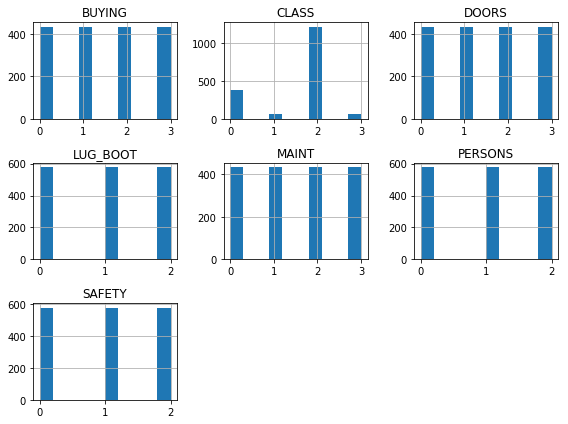

In [14]:
# Distribuição dos atributos dos dataset
df_car_corr.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

# Verificando a correlação dos Dados

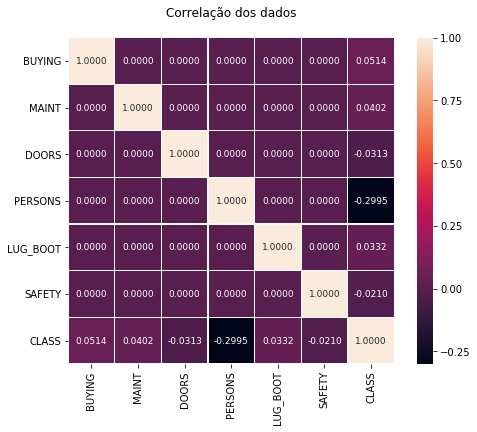

In [15]:
# Plota o gráfico de correlação dos dados.
plt.figure(figsize=(8,6))
ax1 = sns.heatmap(df_car_corr.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, annot=True, fmt='.4f', annot_kws={"size": 9})
plt.title('Correlação dos dados\n')
plt.show()

# Preparando os dados para criação do Modelo de Previsão

In [16]:
# Dividindo os atributos do dataframe 

# Previsores
X = df_car.iloc[:, 0:6].values

# Target
y = df_car.iloc[:,6].values.astype('str')

In [17]:
print('Shape dos dados de X e y')
print(X.shape)
print(y.shape)

Shape dos dados de X e y
(1728, 6)
(1728,)


In [18]:
# Transforma os valores categóricos em valores inteiros
from sklearn.preprocessing import LabelEncoder
x_label_encoder = LabelEncoder()
y_label_encoder  = LabelEncoder()

# Valores de X (previsores). Altera o Shape dos dados de X.
X_le = x_label_encoder.fit_transform(X.ravel())

# Valores de Y (alvo)
y_le = y_label_encoder.fit_transform(y)

In [19]:
y_le.shape

(1728,)

In [20]:
X_le.shape

(10368,)

In [21]:
# Alterando o Shape do array pra ficar igual ao original, após a condificação.
X_le = X_le.reshape(X.shape)
X_le.shape

(1728, 6)

In [22]:
# Gerando vetores binários para cada valor inteiro
from sklearn.preprocessing import OneHotEncoder

x_oneHot = OneHotEncoder(categories='auto')

In [23]:
# Codificando os valores de X em vetores binários
X_oh = x_oneHot.fit_transform(X_le.reshape(X.shape)).toarray()
X_oh

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  1.,  0.,  0.]])

In [24]:
# Fazendo a Padronização dos dados
from sklearn.preprocessing import StandardScaler

#Padroniza os dados de X
scale_x = StandardScaler()
X_p = scale_x.fit_transform(X_oh.astype(float))

In [25]:
X_p.shape

(1728, 21)

In [26]:
X_p

array([[-0.57735027, -0.57735027, -0.57735027, ..., -0.70710678,
         1.41421356, -0.70710678],
       [-0.57735027, -0.57735027, -0.57735027, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [-0.57735027, -0.57735027, -0.57735027, ...,  1.41421356,
        -0.70710678, -0.70710678],
       ..., 
       [-0.57735027,  1.73205081, -0.57735027, ..., -0.70710678,
         1.41421356, -0.70710678],
       [-0.57735027,  1.73205081, -0.57735027, ..., -0.70710678,
        -0.70710678,  1.41421356],
       [-0.57735027,  1.73205081, -0.57735027, ...,  1.41421356,
        -0.70710678, -0.70710678]])

# Testando Alguns Modelos de Machine Learning

In [27]:
# Importando as bibliotecas dos modelos
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost

In [28]:
# Defindo os parâmetos do FOLD
qtd_instancias = len(X_p)
qtd_folds = 23
seed = 7

# Criando a lista de modelos para avaliação.
modelos = []
modelos.append(('AdaBoostClassifier', AdaBoostClassifier()))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
modelos.append(('RandomForestClassifier', RandomForestClassifier(n_estimators=10)))
modelos.append(('ExtraTreesClassifier', ExtraTreesClassifier(n_estimators=10)))
modelos.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
modelos.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos.append(('GaussianNB', GaussianNB()))
modelos.append(('LogisticRegression', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)))
modelos.append(('SVC', SVC()))
modelos.append(('xgboost', xgboost.XGBClassifier()))

In [29]:
# Definindo as listas para análise dos resultados.
resultados = []
nomes_modelos = []
tempo_treinamento_modelos = []

# Treina os Modelos
for nome_modelo, modelo in modelos:
    kfold = model_selection.KFold(n_splits=qtd_folds, random_state=seed)
    #print(nome_modelo)
    #Define o tempo de inicio do Treinamento
    inicio = datetime.now()

    resultados_cros_val = model_selection.cross_val_score(modelo, X_p, y_le.ravel(), cv=kfold, scoring='accuracy')
    
    #Define o tempo final do Treinamento
    fim = datetime.now()   
    tempo_modelo = (fim - inicio).total_seconds()
    tempo_treinamento_modelos.append( tempo_modelo)
    
    resultados.append(resultados_cros_val)   
    nomes_modelos.append(nome_modelo)        
    
    print("\n%s: Acurácia: %.4f (Desvio Padrão: %.4f)"  % (nome_modelo, resultados_cros_val.mean(), resultados_cros_val.std()) )
    print('Tempo de Treinamento: %s segundos' % tempo_modelo )    


AdaBoostClassifier: Acurácia: 0.8262 (Desvio Padrão: 0.0805)
Tempo de Treinamento: 1.563521 segundos

GradientBoostingClassifier: Acurácia: 0.9693 (Desvio Padrão: 0.0350)
Tempo de Treinamento: 12.991915 segundos

RandomForestClassifier: Acurácia: 0.9143 (Desvio Padrão: 0.0562)
Tempo de Treinamento: 0.247937 segundos

ExtraTreesClassifier: Acurácia: 0.9231 (Desvio Padrão: 0.0530)
Tempo de Treinamento: 0.250549 segundos

DecisionTreeClassifier: Acurácia: 0.9422 (Desvio Padrão: 0.0593)
Tempo de Treinamento: 0.038861 segundos

KNeighborsClassifier: Acurácia: 0.8813 (Desvio Padrão: 0.1072)
Tempo de Treinamento: 0.133463 segundos

GaussianNB: Acurácia: 0.8031 (Desvio Padrão: 0.1242)
Tempo de Treinamento: 0.035331 segundos

LogisticRegression: Acurácia: 0.8830 (Desvio Padrão: 0.0635)
Tempo de Treinamento: 1.545738 segundos

SVC: Acurácia: 0.9519 (Desvio Padrão: 0.0578)
Tempo de Treinamento: 2.579427 segundos

xgboost: Acurácia: 0.9196 (Desvio Padrão: 0.0837)
Tempo de Treinamento: 7.980216 se

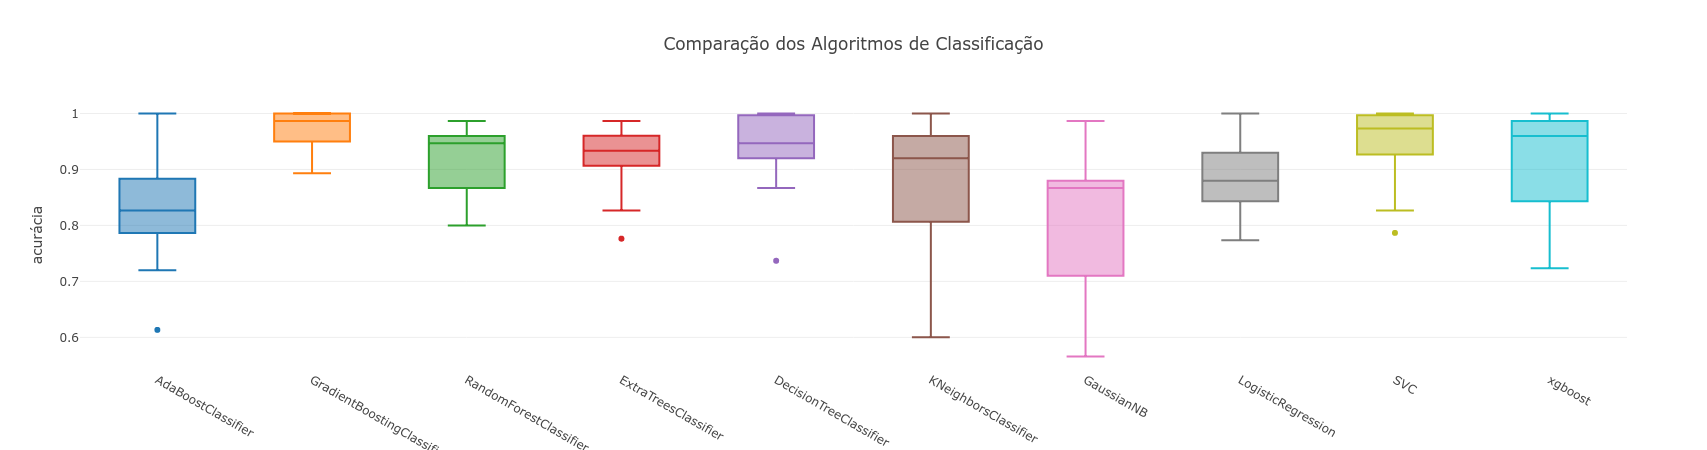

In [30]:
#Plota um gráfico de Comparação dos Algoritmos de Classificação

# Prepara os dados do Plot
resul_AdaBoostClassifier = resultados[0]
resul_GradientBoostingClassifier = resultados[1]
resul_RandomForestClassifier = resultados[2]
resul_ExtraTreesClassifier = resultados[3]
resul_DecisionTreeClassifier = resultados[4]
resul_KNeighborsClassifier = resultados[5]
resul_GaussianNB = resultados[6]
resul_LogisticRegression = resultados[7]
#resul_LogisticRegressionCV = resultados[8]
resul_SVC = resultados[8]
resul_xgboost = resultados[9]

# Configura o Plot.
trace0= go.Box(y=resul_AdaBoostClassifier , name = 'AdaBoostClassifier ')
trace1= go.Box(y=resul_GradientBoostingClassifier , name = 'GradientBoostingClassifier ')
trace2= go.Box(y=resul_RandomForestClassifier , name = 'RandomForestClassifier ')
trace3= go.Box(y=resul_ExtraTreesClassifier , name = 'ExtraTreesClassifier ')
trace4= go.Box(y=resul_DecisionTreeClassifier , name = 'DecisionTreeClassifier ')
trace5= go.Box(y=resul_KNeighborsClassifier , name = 'KNeighborsClassifier ')
trace6= go.Box(y=resul_GaussianNB , name = 'GaussianNB ')
trace7= go.Box(y=resul_LogisticRegression , name = 'LogisticRegression ')
trace8= go.Box(y=resul_SVC , name = 'SVC ')
trace9= go.Box(y=resul_xgboost , name = 'xgboost', )

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]

layout = go.Layout(yaxis=dict(title='acurácia') ,title='Comparação dos Algoritmos de Classificação', showlegend=False)
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )

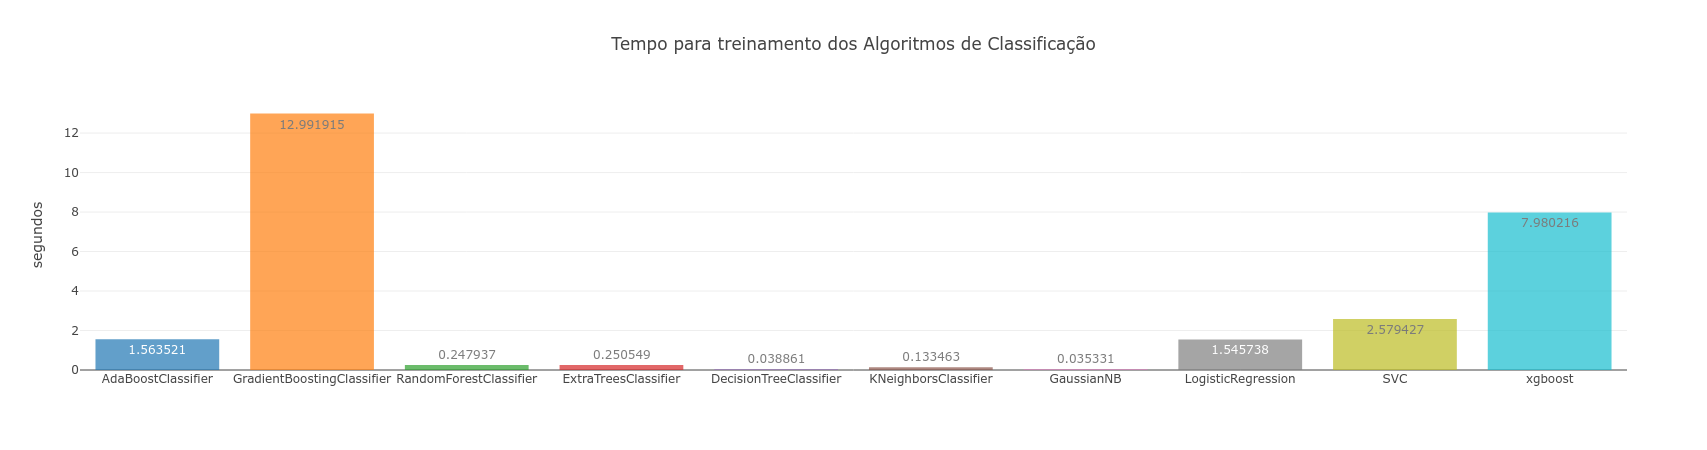

In [31]:
#Plota um gráfico de Comparação dos Tempo de treinamentodos Algoritmos de Classificação
cores = ['rgb(31, 119, 180)',
 'rgb(255, 127, 14)',
 'rgb(44, 160, 44)',
 'rgb(214, 39, 40)',
 'rgb(148, 103, 189)',
 'rgb(140, 86, 75)',
 'rgb(227, 119, 194)',
 'rgb(127, 127, 127)',
 'rgb(188, 189, 34)',
 'rgb(23, 190, 207)']

trace0= go.Bar(y=tempo_treinamento_modelos, x=nomes_modelos, textposition = 'auto', text=tempo_treinamento_modelos,  marker=dict(color=cores),opacity=0.7  )
data=[trace0]

layout = go.Layout(yaxis=dict(title='segundos') ,title='Tempo para treinamento dos Algoritmos de Classificação')
fig = go.Figure(data=data, layout=layout )
py.iplot(fig )


# Escolhendo um Modelo de Previsão

In [32]:
# O algoritmo de classificação que obteve o melhor resultado, apesar do maior tempo para treinamento, foi o GradientBoostingClassifier. Vamos selecionar ele.
# Criando o Modelo
classificador = GradientBoostingClassifier(n_estimators=200)

In [33]:
# Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_p, y_le, test_size = 0.3)

In [34]:
print('Shape dos dados de Treinamento')
print(X_treinamento.shape)
print(y_treinamento.shape)

Shape dos dados de Treinamento
(1209, 21)
(1209,)


In [35]:
print('Shape dos dados de Teste')
print(X_teste.shape)
print(y_teste.shape)

Shape dos dados de Teste
(519, 21)
(519,)


In [36]:
# Treinando o modelo selecionado
classificador.fit(X_treinamento, y_treinamento);

In [37]:
# Realiza a previsão com os dados de Teste
y_previsto = classificador.predict(X_teste)

In [38]:
# Identificando o nome da classe de acordo com a codificação
#acc = 0  #good = 1 #unacc = 2 #vgood = 3
nome_classe = ['acc', 'good', 'unacc', 'vgood']

In [39]:
# Relatório de Classificação
#precision -  daqueles que classifiquei como corretos, quantos efetivamente estavam corretos? 
#recall    -  quando realmente é da classe XPTO, o quão frequente você classifica como XPTO?
#f1-score  -  balanço entre a precisão e o recall. Combina precisão e recall em um número único que indique a qualidade geral do seu modelo (quanto maior melhor o modelo).
#support   -  número de ocorrência de cada classe.

from sklearn.metrics import classification_report
relatorio_classificacao = classification_report(y_teste, y_previsto, target_names=nome_classe ,digits=4)

# Imprimindo o relatório
print('\tRelatório de Classificação do modelo')
print(relatorio_classificacao)

	Relatório de Classificação do modelo
              precision    recall  f1-score   support

         acc     0.9508    0.9915    0.9707       117
        good     0.8710    1.0000    0.9310        27
       unacc     1.0000    0.9858    0.9928       352
       vgood     1.0000    0.8261    0.9048        23

   micro avg     0.9807    0.9807    0.9807       519
   macro avg     0.9554    0.9508    0.9498       519
weighted avg     0.9822    0.9807    0.9807       519



In [40]:
# Visualizar a Matriz de confusão (confusion matrix)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_previsto) 

df_cm = pd.DataFrame(cm, nome_classe,  nome_classe)

print('Obs.: Nas linhas temos os valores reais e nas colunas os valores previstos.\n')
print('\tMatriz de Confusão')
df_cm

Obs.: Nas linhas temos os valores reais e nas colunas os valores previstos.

	Matriz de Confusão


,acc,good,unacc,vgood
acc,116,1,0,0
good,0,27,0,0
unacc,5,0,347,0
vgood,1,3,0,19


# Exibindo os dados de Teste após a Previsão

In [41]:
# Reverte a alteração da escala feita anteriormente
X_teste_scale = scale_x.inverse_transform(X_teste)
X_teste_scale.shape

(519, 21)

In [42]:
# Reverte a alteração do onehot feita anteriormente
X_teste_oh = x_oneHot.inverse_transform(X_teste_scale)
X_teste_oh.shape

(519, 6)

In [43]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
X_teste_le = x_label_encoder.inverse_transform(X_teste_oh.ravel())
X_teste_le.shape

(3114,)

In [44]:
X_teste_le = X_teste_le.reshape(X_teste_oh.shape)
X_teste_le.shape

(519, 6)

In [45]:
df_previsores = pd.DataFrame(X_teste_le, columns=['BUYING', 'MAINT', 'DOORS', 'PERSONS' , 'LUG_BOOT', 'SAFETY'])
#df_previsores.head()

In [46]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_previsto_it = y_label_encoder.inverse_transform(y_previsto.ravel())

In [47]:
# Reverte a transformação para os valores originais feitas pelo Label Encoder feita anteriormente
y_teste_it = y_label_encoder.inverse_transform(y_teste.ravel())

In [48]:
# Dataframe com a classe Real
df_prev = pd.DataFrame(y_previsto_it, columns=['CLASSE_PREVISTA'])

# Dataframe com a classe Prevista
df_real = pd.DataFrame(y_teste_it, columns=['CLASSE_REAL'])

# Juntando os dois dataframes
df_target = pd.merge(df_real, df_prev, right_index=True, left_index=True)
df_target['CLASSE_PREVISTA_CORRETAMENTE'] = df_target.CLASSE_PREVISTA == df_target.CLASSE_REAL


In [49]:
# Agora juntando os dataframes de previsores e target
df_merge = pd.merge(df_previsores, df_target, right_index=True, left_index=True)

In [50]:
# Exibindo somente os registros onde houve erro na previsão da classe.
df_merge[df_merge.CLASSE_PREVISTA_CORRETAMENTE==False]

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASSE_REAL,CLASSE_PREVISTA,CLASSE_PREVISTA_CORRETAMENTE
1,vhigh,med,3,4,med,med,unacc,acc,False
133,low,low,3,more,med,high,vgood,good,False
151,med,low,3,more,med,high,vgood,good,False
204,med,med,3,more,med,high,vgood,acc,False
249,low,med,3,more,med,high,vgood,good,False
364,low,low,3,4,med,med,acc,good,False
424,low,vhigh,3,4,med,med,unacc,acc,False
478,high,med,3,4,med,med,unacc,acc,False
479,high,low,3,4,med,med,unacc,acc,False
508,vhigh,low,3,4,med,med,unacc,acc,False


In [51]:
# Exibindo a quantidade.
df_merge.groupby(['CLASSE_PREVISTA_CORRETAMENTE']).count()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASSE_REAL,CLASSE_PREVISTA
CLASSE_PREVISTA_CORRETAMENTE,,,,,,,,
False,10,10,10,10,10,10,10,10
True,509,509,509,509,509,509,509,509
